# **DESIGN PATTERN IDENTIFIER THROUGH UML DIAGRAMS**

In [ ]:
!pip install -q google-generativeai pillow

Welcome to Software Design Pattern Analyzer
This tool analyzes system architecture and UML diagrams to identify design patterns
Please ensure your diagram is clear and shows architectural/structural relationships

Design Pattern Analysis Menu:
1. Upload local diagram
2. Analyze diagram from URL
Enter your choice (1 or 2): 2
Enter diagram URL: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRogqJkuTZe_LSL3tJpClHG4lVkusEeTRD6xg&s
Analyzing diagram from https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRogqJkuTZe_LSL3tJpClHG4lVkusEeTRD6xg&s for design patterns...


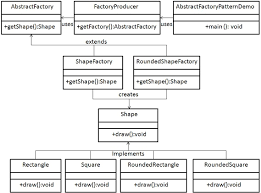

This UML diagram depicts the **Abstract Factory** design pattern. Let's analyze it based on your requested aspects:

**1. Software Design Patterns:**

* **Creational Pattern:**  Abstract Factory is clearly evident.  It doesn't directly use Singleton, Factory (simple factory), or Builder patterns, although it could be *combined* with them in a more complex system.

* **Structural Patterns:** No other structural patterns are explicitly shown.

* **Behavioral Patterns:** No behavioral patterns are directly depicted.


**2. Pattern Implementation Details:**

* **Key components and their relationships:**

    * **`AbstractFactory`:**  An interface defining a method (`getShape`) to create abstract shapes.
    * **`ShapeFactory` and `RoundedShapeFactory`:** Concrete factories implementing `AbstractFactory`. Each creates specific types of shapes.
    * **`Shape`:** An interface defining a `draw` method.
    * **`Rectangle`, `Square`, `RoundedRectangle`, `RoundedSquare`:** Concrete classes implementing `Shape`. These are the products created by the factories.
    * **`FactoryProducer`:** A class that acts as a factory of factories. It decides which concrete factory to instantiate based on the request.
    * **`AbstractFactoryPatternDemo`:** This class likely contains the `main` method, demonstrating the usage of the pattern.


* **Interface definitions:** `AbstractFactory` and `Shape` are interfaces.

* **Class hierarchies:**  `ShapeFactory` and `RoundedShapeFactory` inherit implicitly from `AbstractFactory` (inferred from the UML). `Rectangle`, `Square`, `RoundedRectangle`, and `RoundedSquare` implement `Shape`.

* **Dependency relationships:** `FactoryProducer` depends on `AbstractFactory`.  `ShapeFactory` and `RoundedShapeFactory` depend on `Shape`. The concrete shape classes (`Rectangle`, etc.) depend implicitly on the `Shape` interface.  The `AbstractFactoryPatternDemo` depends on `FactoryProducer`.


**3. Pattern Usage Context:**

* **Problem being solved:** The system needs to create families of related objects without specifying their concrete classes.  This is useful when you have variations of objects (e.g., regular and rounded shapes) and need a way to easily switch between them without modifying the client code.

* **Benefits of the pattern choice:**
    * **Loose coupling:** The client code doesn't directly instantiate concrete shape classes; it interacts with the abstract factory.  This makes the code more flexible and easier to maintain.
    * **Open/closed principle:**  Adding new shapes or factories requires minimal changes to existing code.
    * **Encapsulation:**  The creation logic is encapsulated within the factories.

* **Potential trade-offs:**
    * **Increased complexity:** Introducing abstract factories adds complexity compared to directly instantiating concrete classes.  This might be unnecessary for very simple systems.
    * **Overhead:**  There is some runtime overhead due to the extra layer of indirection through the factory.


**UML Analysis:**

* **Class relationships:**  `AbstractFactory` has a composition/aggregation relationship with `ShapeFactory` and `RoundedShapeFactory` (the factory *creates* shapes).  `ShapeFactory` and `RoundedShapeFactory` have a composition relationship with their corresponding shape classes (the factory *creates* and manages the shapes). `Shape` has an implementation relationship with the concrete shapes (`Rectangle` etc.).

* **Inheritance hierarchies:**  There's an implicit inheritance (or a more general implementation relationship) between `ShapeFactory`/`RoundedShapeFactory` and `AbstractFactory`. The concrete shape classes do not appear to directly inherit from each other.

* **Interface implementations:** `Rectangle`, `Square`, `RoundedRectangle`, and `RoundedSquare` all implement `Shape`.  `ShapeFactory` and `RoundedShapeFactory` (implicitly) implement `AbstractFactory`.

* **Composition vs. aggregation:** The relationship between the factories and the shapes they create is closer to composition (strong ownership; the shapes cannot exist without the factories, in the context of this diagram).  A weaker relationship might be aggregation if the shapes could exist independently.


**Technical Analysis:**

The design is a clean and correct implementation of the Abstract Factory pattern. It promotes flexibility and maintainability by decoupling the client code from concrete shape creation.  The `FactoryProducer` adds a layer of indirection for selecting the appropriate factory, making it easy to add more shape variations in the future.  The overall architecture is well-structured and follows good object-oriented design principles.  The choice of the Abstract Factory pattern is appropriate given the need to create families of related objects.


In [ ]:
import pathlib
import textwrap
import google.generativeai as genai
from IPython.display import display, Image, Markdown
from PIL import Image as PILImage
import requests
import io
from google.colab import files

def analyze_design_patterns(image_path):
    """
    Analyze software design patterns in an image using Gemini 1.5 Flash API

    Args:
        image_path: Path to the image file or URL
    """

    model = genai.GenerativeModel('gemini-1.5-flash')

    try:
        # Handle both local files and URLs
        if image_path.startswith(('http://', 'https://')):
            response = requests.get(image_path)
            img = PILImage.open(io.BytesIO(response.content))
        else:
            img = PILImage.open(image_path)

        # Convert image to RGB if necessary
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Display the image
        display(img)

        # Prepare image for API
        # Convert PIL Image to bytes
        img_byte_arr = io.BytesIO()
        img.save(img_byte_arr, format='JPEG')
        img_byte_arr = img_byte_arr.getvalue()

        # Comprehensive prompt for design pattern analysis
        prompt = """
        Analyze this system architecture/UML diagram and identify:

        1. Software Design Patterns:
           - Creational Patterns (e.g., Singleton, Factory, Builder)
           - Structural Patterns (e.g., Adapter, Bridge, Composite, Decorator)
           - Behavioral Patterns (e.g., Observer, Strategy, Command)

        2. Pattern Implementation Details:
           - Key components and their relationships
           - Interface definitions
           - Class hierarchies
           - Dependency relationships

        3. Pattern Usage Context:
           - Problem being solved
           - Benefits of the pattern choice
           - Any potential trade-offs

        If this is a UML diagram, analyze:
        - Class relationships
        - Inheritance hierarchies
        - Interface implementations
        - Composition vs aggregation

        Provide a technical analysis focusing on software design patterns and architectural decisions.
        """

        # Create structured input for the model
        parts = [
            {
                'text': prompt
            },
            {
                'inline_data': {  # Correct structure for the image part
                    'mime_type': 'image/jpeg',
                    'data': img_byte_arr
                }
            }
        ]

        # Generate response from Gemini
        response = model.generate_content(parts)

        # Display formatted response
        display(Markdown(response.text))

    except Exception as e:
        print(f"Error analyzing image: {str(e)}")
        raise e  # Re-raise to see full traceback

# Function to handle file upload in Colab
def upload_and_analyze():
    """
    Upload an image and analyze its design patterns
    """
    print("Please upload an image of a system architecture or UML diagram...")
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f"\nAnalyzing {filename} for design patterns...")
        analyze_design_patterns(filename)

genai.configure(api_key='<apikey>')
# Function to analyze image from URL
def analyze_url(url):
    """
    Analyze design patterns in an image from URL
    """
    print(f"Analyzing diagram from {url} for design patterns...")
    analyze_design_patterns(url)

def main():
    print("\nDesign Pattern Analysis Menu:")
    print("1. Upload local diagram")
    print("2. Analyze diagram from URL")

    choice = input("Enter your choice (1 or 2): ")

    if choice == '1':
        upload_and_analyze()
    elif choice == '2':
        url = input("Enter diagram URL: ")
        analyze_url(url)
    else:
        print("Invalid choice!")

if __name__ == "__main__":
    # Install required packages
    try:
        import google.generativeai as genai
    except ImportError:
        print("Installing required packages...")
        !pip install -q google-generativeai pillow
        import google.generativeai as genai

    print("Welcome to Software Design Pattern Analyzer")
    print("This tool analyzes system architecture and UML diagrams to identify design patterns")
    print("Please ensure your diagram is clear and shows architectural/structural relationships")
    main()

# **DESIGN PATTERN IDENTIFIER THROUGH CODE**

In [ ]:
!apt install libgraphviz-dev # Install system dependency for pygraphviz
!pip install pygraphviz javalang

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

In [ ]:
import google.generativeai as genai
import pygraphviz as pgv
import re


# Function to detect design patterns
def detect_patterns_using_gemini(java_code):
    """
    Detects design patterns in the given Java code using the Gemini AI model.

    Args:
        java_code: The Java code as a string.

    Returns:
        A list of design patterns identified in the code and suggestions.
    """
    model = genai.GenerativeModel("gemini-1.5-flash")
    prompt = f"Analyze the following Java code for design patterns:\n\n{java_code}\n\nProvide the design patterns detected and suggestions for improvements."

    response = model.generate_content(prompt)
    content = response.text

    design_patterns = []
    suggestions = []

    # List of design patterns to check
    patterns = {
        "Singleton": "Consider using double-checked locking for thread safety.",
        "Factory": "Consider using an abstract factory for creating families of related objects.",
        "Strategy": "Consider using a concrete class to represent each strategy, and allow them to be switched dynamically.",
        "Observer": "Consider using the observer pattern for event-driven systems.",
        "Decorator": "Consider using the decorator pattern to add responsibilities to objects dynamically.",
        "Facade": "Consider using the facade pattern to simplify the interface to a complex system.",
        "Abstract Factory": "Consider using abstract factories to create families of related products.",
        "Builder": "Consider using the builder pattern to construct complex objects step by step.",
        "Prototype": "Consider using the prototype pattern to clone objects without knowing their class.",
        "Adapter": "Consider using the adapter pattern to enable incompatible interfaces to work together.",
        "Composite": "Consider using the composite pattern to treat individual objects and compositions uniformly.",
        "Command": "Consider using the command pattern to turn requests into objects that can be queued or logged.",
        "Mediator": "Consider using the mediator pattern to reduce direct communication between classes.",
        "State": "Consider using the state pattern to allow an object to alter its behavior when its internal state changes.",
        "Chain of Responsibility": "Consider using the chain of responsibility pattern to pass a request along a chain of handlers.",
        "Iterator": "Consider using the iterator pattern to provide a way to access elements of a collection sequentially.",
        "Proxy": "Consider using the proxy pattern to control access to an object, often for performance or security reasons.",
        "Flyweight": "Consider using the flyweight pattern to reduce the memory usage of objects that are frequently duplicated.",
        "Memento": "Consider using the memento pattern to capture and restore an object's internal state.",
        "Interpreter": "Consider using the interpreter pattern to define a language and interpret sentences in that language.",
        "Visitor": "Consider using the visitor pattern to add new operations to existing object structures without modifying them.",
        "Singleton": "Ensure the singleton pattern is properly implemented to prevent multiple instances of a class.",
        "Dependency Injection": "Consider using dependency injection for better separation of concerns and testing.",
    }

    for pattern, suggestion in patterns.items():
        if pattern in content:
            design_patterns.append(pattern)
            suggestions.append(suggestion)

    return design_patterns, suggestions

# Function to dynamically analyze Java code and generate UML diagram (DOT format)
def analyze_java_code(java_code):
    """
    Analyzes Java code to generate a UML diagram, identify design patterns,
    and suggest improvements using Gemini AI.

    Args:
        java_code: The Java code as a string.

    Returns:
        A dictionary containing the UML diagram (PlantUML format), identified
        design patterns, and suggestions for improvements.
    """
    # Regular expressions to extract classes, methods, and relationships
    class_pattern = r'class\s+(\w+)\s*\{'
    method_pattern = r'public\s+[\w<>,]+\s+(\w+)\s*\(.\)\s\{'

    # Find all classes
    classes = re.findall(class_pattern, java_code)

    uml_diagram = "digraph G {\n"

    # Iterate over each class and generate class information
    for class_name in classes:
        methods = re.findall(f'class\s+{class_name}.*?{method_pattern}', java_code, re.DOTALL)
        method_str = ' | '.join([method for method in methods])
        uml_diagram += f'  "{class_name}" [shape=record, label="{{ {class_name} | {method_str} }}"]\n'

    # Define relationships (you can extend this to detect more complex relationships)
    for class_name in classes:
        # Check for relationships (e.g., inheritance, composition)
        if "extends" in java_code or "implements" in java_code:
            uml_diagram += f'  "{class_name}" -> "BaseClass" [label="extends or implements"]\n'

    uml_diagram += "}\n"  # End of the DOT graph

    design_patterns, suggestions = detect_patterns_using_gemini(java_code)

    return {
        "uml": uml_diagram,
        "patterns": design_patterns,
        "suggestions": suggestions,
    }

# Function to save UML diagram as an image file
def save_uml_image(uml_code, output_path="uml_diagram.png"):
    """
    Converts the UML code in DOT format to an image and saves it to the specified file path.

    Args:
        uml_code: The UML diagram in DOT format.
        output_path: The file path where the UML image will be saved.
    """
    # Create a Graphviz source from the DOT code
    graph = pgv.AGraph(string=uml_code)

    # Save the graph to a PNG file
    graph.draw(output_path, prog="dot", format="png")
    print(f"UML diagram saved as {output_path}")
genai.configure(api_key="<apikey>")

# Example usage
java_code = """
// Abstract Handler class
abstract class Logger {
    protected Logger nextLogger;

    // Set the next logger in the chain
    public void setNextLogger(Logger nextLogger) {
        this.nextLogger = nextLogger;
    }

    // Handle the request
    public abstract void logMessage(String message);
}

// Concrete Handlers
class InfoLogger extends Logger {
    @Override
    public void logMessage(String message) {
        if (message.equals("INFO")) {
            System.out.println("INFO Logger: " + message);
        } else if (nextLogger != null) {
            nextLogger.logMessage(message);
        }
    }
}

class DebugLogger extends Logger {
    @Override
    public void logMessage(String message) {
        if (message.equals("DEBUG")) {
            System.out.println("DEBUG Logger: " + message);
        } else if (nextLogger != null) {
            nextLogger.logMessage(message);
        }
    }
}

class ErrorLogger extends Logger {
    @Override
    public void logMessage(String message) {
        if (message.equals("ERROR")) {
            System.out.println("ERROR Logger: " + message);
        } else if (nextLogger != null) {
            nextLogger.logMessage(message);
        }
    }
}

// Client class
public class ChainOfResponsibilityDemo {
    public static void main(String[] args) {
        // Create handlers
        Logger infoLogger = new InfoLogger();
        Logger debugLogger = new DebugLogger();
        Logger errorLogger = new ErrorLogger();

        // Set up the chain
        infoLogger.setNextLogger(debugLogger);
        debugLogger.setNextLogger(errorLogger);

        // Send messages through the chain
        System.out.println("Logging INFO message:");
        infoLogger.logMessage("INFO");

        System.out.println("\nLogging DEBUG message:");
        infoLogger.logMessage("DEBUG");

        System.out.println("\nLogging ERROR message:");
        infoLogger.logMessage("ERROR");

        System.out.println("\nLogging unknown message:");
        infoLogger.logMessage("UNKNOWN");
    }
}
"""

# Analyze the Java code
result = analyze_java_code(java_code)

# Print the results
if isinstance(result, dict):
    print("UML Diagram (DOT format):")
    print(result["uml"])  # Print UML code

    # Save UML diagram as an image file
    save_uml_image(result["uml"], "uml_diagram.png")

    print("\nDetected Design Patterns:")
    for pattern in result["patterns"]:
        print(pattern)

    print("\nSuggestions for Improvements:")
    for suggestion in result["suggestions"]:
        print(suggestion)

else:
    print(result)  # Print the error message

UML Diagram (DOT format):
digraph G {
  "Logger" [shape=record, label="{ Logger |  }"]
  "ChainOfResponsibilityDemo" [shape=record, label="{ ChainOfResponsibilityDemo |  }"]
  "Logger" -> "BaseClass" [label="extends or implements"]
  "ChainOfResponsibilityDemo" -> "BaseClass" [label="extends or implements"]
}

UML diagram saved as uml_diagram.png

Detected Design Patterns:
Chain of Responsibility

Suggestions for Improvements:
Consider using the chain of responsibility pattern to pass a request along a chain of handlers.


# **PLANT UML**

In [ ]:
!pip install plantuml
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


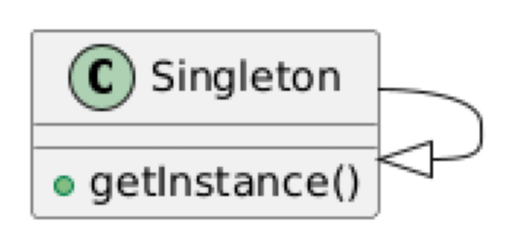

In [ ]:
from plantuml import PlantUML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the PlantUML server URL
server = PlantUML(url='http://www.plantuml.com/plantuml/img/')

# PlantUML code for a simple design pattern (e.g., Singleton Pattern)
plantuml_code = """
@startuml
class Singleton {
  +getInstance()
}
Singleton -down-|> Singleton
@enduml
"""

# Render the diagram
with open("singleton.uml", "w") as f:
    f.write(plantuml_code)

# Generate the image
server.processes_file("singleton.uml")

# Display the image
img = mpimg.imread('singleton.png')
plt.imshow(img)
plt.axis('off')
plt.show()


# **INTERFACE**

In [ ]:
!pip install -q google-generativeai pillow ipywidgets pygraphviz
!apt-get -qq install -y graphviz graphviz-dev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pygraphviz)
Selecting previously unselected package libgtk2.0-common.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../0-libgtk2.0-common_2.24.33-2ubuntu2.1_all.deb ...
Unpacking libgtk2.0-common (2.24.33-2ubuntu2.1) ...
Selecting previously unselected package libgtk2.0

# **COMMAND LINE INTERFACE**

In [ ]:
!pip install -q google-generativeai pillow ipywidgets

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML, Image
import google.generativeai as genai
from PIL import Image as PILImage
import requests
import io
from google.colab import files
import re

class DesignPatternAnalyzer:
    def __init__(self):
        # Configure Gemini API
        genai.configure(api_key='<apikey>')
        self.setup_ui()

    def setup_ui(self):
        # Style definitions
        style = """
        <style>
        .custom-container {
            border: 1px solid #e0e0e0;
            border-radius: 8px;
            padding: 20px;
            margin: 10px 0;
            background-color: #f8f9fa;
        }
        .result-container {
            background-color: #ffffff;
            border-left: 4px solid #2196F3;
            padding: 15px;
            margin: 10px 0;
            border-radius: 4px;
        }
        .pattern-item {
            background-color: #e3f2fd;
            padding: 8px;
            margin: 5px 0;
            border-radius: 4px;
        }
        .suggestion-item {
            background-color: #f5f5f5;
            padding: 8px;
            margin: 5px 0;
            border-radius: 4px;
        }
        </style>
        """
        display(HTML(style))

        # Create main tabs
        self.tab = widgets.Tab()
        self.tab.children = [self.create_uml_tab(), self.create_code_tab()]
        self.tab.set_title(0, 'UML Diagram Analysis')
        self.tab.set_title(1, 'Code Pattern Analysis')

        # Display header and tabs
        display(HTML("<h1 style='color: #2196F3; text-align: center; font-family: Arial;'>Design Pattern Analyzer</h1>"))
        display(self.tab)

    def create_uml_tab(self):
        # UML Analysis Components
        self.uml_source = widgets.RadioButtons(
            options=['Upload Image', 'URL'],
            description='Source:',
            layout={'width': 'max-content'}
        )

        self.url_input = widgets.Text(
            placeholder='Enter image URL',
            disabled=True,
            layout={'width': '60%'}
        )

        self.upload_button = widgets.FileUpload(
            accept='image/*',
            multiple=False,
            layout={'width': 'max-content'},
            description='Upload Image'
        )

        self.analyze_uml_button = widgets.Button(
            description='Analyze Diagram',
            button_style='primary',
            layout={'width': 'max-content'}
        )

        self.uml_output = widgets.Output()

        # Layout with custom styling
        uml_container = widgets.VBox([
            widgets.HTML('<div class="custom-container">'),
            widgets.HTML("<h2 style='color: #1976D2;'>UML Diagram Analysis</h2>"),
            widgets.HBox([self.uml_source]),
            widgets.HBox([self.url_input]),
            widgets.HBox([self.upload_button]),
            widgets.HBox([self.analyze_uml_button]),
            self.uml_output,
            widgets.HTML('</div>')
        ], layout={'padding': '10px'})

        # Events
        self.uml_source.observe(self.toggle_input_method, names='value')
        self.analyze_uml_button.on_click(self.analyze_uml)

        return uml_container

    def create_code_tab(self):
        # Code Analysis Components
        self.code_input = widgets.Textarea(
            placeholder='Enter Java code here...',
            layout={'width': '100%', 'height': '300px'}
        )

        self.analyze_code_button = widgets.Button(
            description='Analyze Code',
            button_style='primary',
            layout={'width': 'max-content'}
        )

        self.code_output = widgets.Output()

        # Layout with custom styling
        code_container = widgets.VBox([
            widgets.HTML('<div class="custom-container">'),
            widgets.HTML("<h2 style='color: #1976D2;'>Code Pattern Analysis</h2>"),
            self.code_input,
            self.analyze_code_button,
            self.code_output,
            widgets.HTML('</div>')
        ], layout={'padding': '10px'})

        # Events
        self.analyze_code_button.on_click(self.analyze_code)

        return code_container

    def toggle_input_method(self, change):
        if change['new'] == 'URL':
            self.url_input.disabled = False
            self.upload_button.disabled = True
        else:
            self.url_input.disabled = True
            self.upload_button.disabled = False

    def analyze_uml(self, button):
        with self.uml_output:
            clear_output()
            try:
                if self.uml_source.value == 'URL':
                    self.analyze_uml_from_url(self.url_input.value)
                else:
                    if not self.upload_button.value:
                        display(HTML(
                            "<div style='color: #f44336; padding: 10px; border-left: 4px solid #f44336;'>"
                            "Please upload an image first.</div>"
                        ))
                        return
                    self.analyze_uml_from_upload(self.upload_button)
            except Exception as e:
                display(HTML(
                    f"<div style='color: #f44336; padding: 10px; border-left: 4px solid #f44336;'>"
                    f"Error: {str(e)}</div>"
                ))

    def analyze_uml_from_url(self, url):
        model = genai.GenerativeModel('gemini-1.5-flash')
        response = requests.get(url)
        img = PILImage.open(io.BytesIO(response.content))

        if img.mode != 'RGB':
            img = img.convert('RGB')

        display(img)

        img_byte_arr = io.BytesIO()
        img.save(img_byte_arr, format='JPEG')
        img_byte_arr = img_byte_arr.getvalue()

        self.analyze_image_with_gemini(model, img_byte_arr)

    def analyze_uml_from_upload(self, uploader):
        model = genai.GenerativeModel('gemini-1.5-flash')
        for filename, file_info in uploader.value.items():
            img = PILImage.open(io.BytesIO(file_info['content']))

            if img.mode != 'RGB':
                img = img.convert('RGB')

            display(img)

            img_byte_arr = io.BytesIO()
            img.save(img_byte_arr, format='JPEG')
            img_byte_arr = img_byte_arr.getvalue()

            self.analyze_image_with_gemini(model, img_byte_arr)

    def analyze_image_with_gemini(self, model, img_bytes):
        prompt = """
        Analyze this system architecture/UML diagram and identify:
        1. Software Design Patterns
        2. Pattern Implementation Details
        3. Pattern Usage Context
        4. Class relationships and hierarchies

        Provide a clear, structured analysis focusing on architectural decisions.
        """

        parts = [
            {'text': prompt},
            {
                'inline_data': {
                    'mime_type': 'image/jpeg',
                    'data': img_bytes
                }
            }
        ]

        response = model.generate_content(parts)
        display(HTML(f"<div class='result-container'>{response.text}</div>"))

    def analyze_code(self, button):
        with self.code_output:
            clear_output()
            try:
                java_code = self.code_input.value
                if not java_code.strip():
                    display(HTML(
                        "<div style='color: #f44336; padding: 10px; border-left: 4px solid #f44336;'>"
                        "Please enter some Java code first.</div>"
                    ))
                    return

                # Analyze code using Gemini
                model = genai.GenerativeModel('gemini-1.5-flash')
                prompt = f"""
                Analyze this Java code and identify:
                1. Design patterns used
                2. Implementation details
                3. Suggestions for improvements
                4. Class relationships

                Code:
                {java_code}
                """

                response = model.generate_content(prompt)

                # Display results
                display(HTML("<h3 style='color: #1976D2;'>Analysis Results:</h3>"))
                display(HTML(f"<div class='result-container'>{response.text}</div>"))

            except Exception as e:
                display(HTML(
                    f"<div style='color: #f44336; padding: 10px; border-left: 4px solid #f44336;'>"
                    f"Error analyzing code: {str(e)}</div>"
                ))

# Create and display the interface
analyzer = DesignPatternAnalyzer()

# **GRADIO INTERFACE**

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
!apt-get update
!apt-get install -y graphviz graphviz-dev
!pip install gradio google-generativeai pillow pygraphviz

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,148 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,512 kB]
Get:13 http://archive.ubuntu.c

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
!pip install flask-ngrok
!ngrok authtoken '2opL9pkxvD3Nk9CP6oXBuTcXluS_89cqqdFE33K2ybURuVaq2'

/bin/bash: line 1: ngrok: command not found


In [ ]:
import gradio as gr
import google.generativeai as genai
import pygraphviz as pgv
import re
from PIL import Image
import io
import requests
import tempfile
import os
from concurrent.futures import ThreadPoolExecutor, TimeoutError


genai.configure(api_key='<apikey>')

def analyze_uml_image(image, progress=gr.Progress()):
    """Analyze UML diagram image using Gemini API with timeout"""
    try:
        progress(0.2, desc="Processing image...")
        model = genai.GenerativeModel('gemini-1.5-flash')

        # Convert image to bytes if needed
        if isinstance(image, str):
            response = requests.get(image, timeout=10)
            img_bytes = response.content
        else:
            img_byte_arr = io.BytesIO()
            image.save(img_byte_arr, format='JPEG')
            img_bytes = img_byte_arr.getvalue()

        progress(0.4, desc="Analyzing diagram...")
        prompt = """
        Analyze this UML diagram and identify:
        1. Design Pattern(s) used (if any)
        2. Class relationships and hierarchies
        3. Key components and their roles
        Provide a concise technical analysis.
        """

        parts = [
            {'text': prompt},
            {
                'inline_data': {
                    'mime_type': 'image/jpeg',
                    'data': img_bytes
                }
            }
        ]

        # Set timeout for API call
        with ThreadPoolExecutor() as executor:
            future = executor.submit(model.generate_content, parts)
            response = future.result(timeout=20)

        progress(1.0, desc="Analysis complete!")
        return response.text

    except TimeoutError:
        return "Error: Analysis timed out. Please try again with a clearer image."
    except Exception as e:
        return f"Error analyzing image: {str(e)}"

def analyze_code_patterns(code, progress=gr.Progress()):
    """Analyze Java code for design patterns with progress tracking"""
    try:
        progress(0.3, desc="Analyzing code...")
        model = genai.GenerativeModel("gemini-1.5-flash")
        prompt = f"""Analyze this Java code for design patterns. Provide:
        1. Identified design patterns
        2. Brief explanation of pattern implementation
        3. Quick improvement suggestions

        Code:
        {code}
        """

        # API call with timeout
        with ThreadPoolExecutor() as executor:
            future = executor.submit(model.generate_content, prompt)
            response = future.result(timeout=15)

        progress(0.6, desc="Generating UML...")

        # Generate simple UML visualization
        if len(code.strip()) > 0:
            try:
                uml_path = generate_quick_uml(code)
                progress(1.0, desc="Complete!")
                return response.text, uml_path
            except Exception as e:
                return f"{response.text}\n\nUML Generation Error: {str(e)}", None
        else:
            return "Please enter some Java code to analyze.", None

    except TimeoutError:
        return "Error: Analysis timed out. Please try again with shorter code.", None
    except Exception as e:
        return f"Error: {str(e)}", None

def generate_quick_uml(java_code):
    """Generate a simplified UML diagram"""
    class_pattern = r'class\s+(\w+)'
    classes = re.findall(class_pattern, java_code)

    dot = "digraph G {\n"
    dot += '  rankdir=TB;\n'
    dot += '  node [shape=record, style=filled, fillcolor=lightgray];\n'

    # Add classes
    for cls in classes:
        dot += f'  {cls} [label="{cls}"];\n'

    # Add basic relationships
    for i in range(len(classes)-1):
        dot += f'  {classes[i]} -> {classes[i+1]} [dir=back, arrowhead=empty];\n'

    dot += "}\n"

    # Save diagram
    output_path = "uml_output.png"
    graph = pgv.AGraph(string=dot)
    graph.draw(output_path, prog="dot")
    return output_path

# Gradio Interface
def create_interface():
    with gr.Blocks(title="Design Pattern Analyzer", theme=gr.themes.Soft()) as app:
        gr.Markdown("""
        # Design Pattern Analyzer
        Upload a UML diagram or input Java code to analyze design patterns.
        """)

        with gr.Tab("UML Diagram Analysis"):
            with gr.Row():
                image_input = gr.Image(type="pil", label="Upload UML Diagram")
                image_analysis = gr.Textbox(label="Analysis Result", lines=10)
            analyze_btn = gr.Button("Analyze UML Diagram", variant="primary")
            analyze_btn.click(
                analyze_uml_image,
                inputs=[image_input],
                outputs=[image_analysis]
            )

        with gr.Tab("Code Pattern Analysis"):
            with gr.Row():
                # Changed from Code to Textbox component
                code_input = gr.Textbox(
                    label="Java Code Input",
                    placeholder="Paste your Java code here...",
                    lines=10
                )
                code_analysis = gr.Textbox(label="Analysis Result", lines=10)
            with gr.Row():
                uml_output = gr.Image(type="filepath", label="Generated UML")
            analyze_code_btn = gr.Button("Analyze Code", variant="primary")
            analyze_code_btn.click(
                analyze_code_patterns,
                inputs=[code_input],
                outputs=[code_analysis, uml_output]
            )

        gr.Markdown("""
        ### Notes:
        - Analysis typically takes 10-15 seconds
        - For best results, use clear UML diagrams
        - Maximum code size: 2000 characters
        """)

    return app

if __name__ == "__main__":
    # Ensure required packages are installed
    os.system("pip install -q gradio google-generativeai pillow pygraphviz")
    os.system("apt-get install -y graphviz graphviz-dev")

    app = create_interface()
    app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5b7bdd7d6d964672a0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
